In [106]:
%matplotlib inline

from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_table("/home/vdn/shared-with-me/pdbsim/loops.txt.gz", sep="\t")

In [20]:
df.shape

(26021320, 18)

In [21]:
df.head(20)

,pdb_id,tcr_v_allele,tcr_region,aa_tcr,len_tcr,pos_tcr,x,y,z,aa_kmer,chain_id_kmer,pdb_id_kmer,start_kmer,x_kmer,y_kmer,z_kmer,delta,rmsd
0,2ypl,TRBV19*01,CDR3,C,11,0,0.000000,0.000000e+00,0.000000e+00,S,A,3dt2,547,0.000000,0.000000e+00,0.000000e+00,0.000000,1.419201
1,2ypl,TRBV19*01,CDR3,A,11,1,2.534935,1.477557e-01,2.856983e+00,A,A,3dt2,547,2.351222,-1.299914e-01,2.994797e+00,0.129886,1.419201
2,2ypl,TRBV19*01,CDR3,S,11,2,3.679389,-1.682321e+00,6.002911e+00,K,A,3dt2,547,4.178434,-2.766051e+00,5.003392e+00,2.422553,1.419201
3,2ypl,TRBV19*01,CDR3,T,11,3,5.996446,-1.094339e+00,8.976842e+00,L,A,3dt2,547,5.271529,-2.023841e+00,8.597661e+00,1.533256,1.419201
4,2ypl,TRBV19*01,CDR3,G,11,4,8.505212,-3.344016e+00,1.073696e+01,T,A,3dt2,547,9.004950,-2.272426e+00,9.373747e+00,3.256380,1.419201
5,2ypl,TRBV19*01,CDR3,S,11,5,11.446544,-1.280467e+00,1.201981e+01,P,A,3dt2,547,11.043735,-1.049604e+00,1.234834e+01,0.323488,1.419201
6,2ypl,TRBV19*01,CDR3,Y,11,6,12.154551,2.376822e+00,1.110362e+01,I,A,3dt2,547,11.892047,2.241682e+00,1.062781e+01,0.313567,1.419201
7,2ypl,TRBV19*01,CDR3,G,11,7,10.320304,3.620028e+00,8.036668e+00,G,A,3dt2,547,8.359068,3.037677e+00,9.476304e+00,6.258132,1.419201
8,2ypl,TRBV19*01,CDR3,Y,11,8,7.939389,2.054790e+00,5.550347e+00,Y,A,3dt2,547,6.100795,1.980212e+00,6.627371e+00,4.545974,1.419201
9,2ypl,TRBV19*01,CDR3,T,11,9,7.993178,-7.982514e-01,3.068269e+00,V,A,3dt2,547,7.605080,9.823408e-01,3.288212e+00,3.369503,1.419201


In [29]:
tmp = Counter(df["len_tcr"])
print([tmp[x] / int(x) for x in tmp])
tmp

[3082.0, 7395.0, 1173110.0, 686916.0, 336957.0, 15445.0, 10279.0]


Counter({10: 73950,
         11: 12904210,
         12: 8242992,
         13: 4380441,
         14: 216230,
         15: 154185,
         16: 49312})

/home/vdn/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


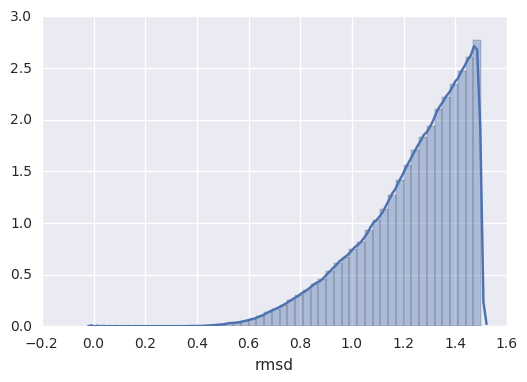

In [39]:
sns.distplot(df["rmsd"])

In [79]:
df_cdr = df[["pdb_id", "tcr_v_allele", "tcr_region", "aa_tcr", "len_tcr", "pos_tcr", "x", "y", "z"]]
df_cdr.drop_duplicates(inplace=True)
print(df_cdr.shape)
tmp = Counter(df_cdr["len_tcr"])
print([tmp[x] / int(x) for x in tmp])
df_cdr.head()

(3308, 9)
[32.0, 1.0, 21.0, 32.0, 69.0, 46.0, 42.0]


/home/vdn/anaconda3/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


,pdb_id,tcr_v_allele,tcr_region,aa_tcr,len_tcr,pos_tcr,x,y,z
0,2ypl,TRBV19*01,CDR3,C,11,0,0.000000,0.000000,0.000000
1,2ypl,TRBV19*01,CDR3,A,11,1,2.534935,0.147756,2.856983
2,2ypl,TRBV19*01,CDR3,S,11,2,3.679389,-1.682321,6.002911
3,2ypl,TRBV19*01,CDR3,T,11,3,5.996446,-1.094339,8.976842
4,2ypl,TRBV19*01,CDR3,G,11,4,8.505212,-3.344016,10.736956


In [35]:
df_put = df[["len_tcr", "aa_kmer", "chain_id_kmer", "pdb_id_kmer", "start_kmer", "x_kmer", "y_kmer", "z_kmer"]]
df_put.drop_duplicates(inplace=True)
print(df_put.shape)
tmp = Counter(df_put["len_tcr"])
print([tmp[x] / int(x) for x in tmp])
df_put.head()

(5050217, 8)
[2777.0, 7395.0, 180085.0, 146617.0, 75130.0, 7344.0, 7466.0]


/home/vdn/anaconda3/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


,len_tcr,aa_kmer,chain_id_kmer,pdb_id_kmer,start_kmer,x_kmer,y_kmer,z_kmer
0,11,S,A,3dt2,547,0.000000,0.000000,0.000000
1,11,A,A,3dt2,547,2.351222,-0.129991,2.994797
2,11,K,A,3dt2,547,4.178434,-2.766051,5.003392
3,11,L,A,3dt2,547,5.271529,-2.023841,8.597661
4,11,T,A,3dt2,547,9.004950,-2.272426,9.373747


In [141]:
# for LEN in range(10, 17):
#     tmp = df_cdr.ix[df_cdr["len_tcr"] == LEN, "aa_tcr"]
#     tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))
#     print(len(tmp2), len(set(tmp2)))

LEN=13
tmp = df_cdr.ix[df_cdr["len_tcr"] == LEN, "aa_tcr"]
tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))

tmp3 = df_cdr.ix[df_cdr["len_tcr"] == LEN, "tcr_v_allele"]
tmp3 = tmp3.reshape((-1, LEN))[:,0]

tmp4 = df_cdr.ix[df_cdr["len_tcr"] == LEN, "x"]
tmp4 = tmp4.reshape((-1, LEN))
tmp5 = pd.DataFrame(np.hstack([pd.DataFrame({"v": tmp3, "seq": tmp2}), pd.DataFrame(tmp4)]))
tmp5.columns = ["seq", "v"] + list(map(lambda i: "x"+str(i), range(LEN)))
tmp6 = tmp5.groupby(["seq", "v"]).aggregate(lambda x: x.std())
tmp6

,,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
seq,v,,,,,,,,,,,,,
CAAEASNTNKVVF,TRAV4D-4*03,0.0,0.029158,0.022450,0.078714,0.112555,0.168426,0.147446,0.152011,0.217220,0.080701,0.034116,0.018253,0.058732
CAAEPSSGQKLVF,TRAV4D-4*03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAALIQGAQKLVF,TRAV22*01,0.0,0.063895,0.053846,0.127228,0.093779,0.061992,0.245856,0.167121,0.073574,0.216362,0.106975,0.153909,0.118121
CAARYQGGRALIF,TRAV14-1*01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAASANSGTYQRF,TRAV14-3*01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMREDTGNQFYF,TRAV14_DV4*01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMRGDSSYKLIF,TRAV12-3*01,0.0,0.086241,0.200850,0.160144,0.336909,0.314632,0.284524,0.161097,0.170202,0.219529,0.173800,0.187660,0.116749
CASGDFWGDTLYF,TRBV13-2*01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASGGQGRAEQFF,TRBV13-2*03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
print("L all uniq")
for LEN in range(10, 17):
    tmp = df_cdr.ix[df_cdr["len_tcr"] == LEN, "aa_tcr"]
    tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))
    print(LEN, len(tmp2), len(set(tmp2)))

L all uniq
10 1 1
11 21 14
12 32 16
13 69 37
14 46 31
15 42 25
16 32 11


In [116]:
print("L all uniq")
for LEN in range(10, 17):
    tmp = df_put.ix[df_put["len_tcr"] == LEN, "aa_kmer"]
    tmp2 = list(map(lambda x: "".join(x), tmp.reshape((-1, LEN))))
    print(LEN, len(tmp2), len(set(tmp2)))

L all uniq
10 7395 1709
11 180085 23783
12 146617 17521
13 75130 10288
14 7344 1518
15 7466 1296
16 2777 496
